# Depression Feedback Signal
## Full-spectrum readout

## Overview
Banding out frequency-domain representations of recordings can be problematic for several reasons [see ]().
In this notebook we'll propose a full-spectrum readout that avoids *a priori* banding of oscillations.
Instead, the bands will emerge from the data itself.
A secondary benefit of this approach is the avoidance of artifacts that may not be helpful in predicting the depression state.

In previous notebooks we've used regularized regression to learn linear models capable of predicting depression state from *oscillatory* band powers.
Why limit ourselves, *a priori*, to predefined bands?
In this notebook we'll take a more generalized approach to identifying frequency-domain readouts in a novel approach called *full-spectrum readout*.

## Results

First, we'll bring in our imports.

* DBSpace
    * We import primarily form the readout submodule
    * BR_Data_Tree is a class that wraps our chronic data and provides basic data handling methods
* Pickle lets us import data in a Python-rich way
* Matplotlib gives us plotting
* Numpy gives us basic numericals

In [1]:
from DBSpace.readout.BR_DataFrame import BR_Data_Tree
from DBSpace.readout import ClinVect
import pickle
from DBSpace.readout import DSV

import matplotlib.pyplot as plt
import numpy as np


Using DBSpace LATEST
Importing from biometrics...


In [2]:
ClinFrame = ClinVect.CFrame(norm_scales=True)
BRFrame = pickle.load(open('/home/virati/Chronic_Frame.pickle',"rb"))

Generating mHDRS
Generating DSC Measure


In [3]:
analysis = DSV.DSV(BRFrame,ClinFrame,lim_freq=100,use_scale='HDRS17')

ENet_params = {'Alpha':(0.1,0.2),'Lambda':(0.5,0.6)}


Taking Weekly Averages
Polynomial Subtraction of order 4
Limiting Frequency
Polynomial Subtraction of order 4
Limiting Frequency
Running ENet CV
Training Elastic Net...
ENet CV Params: Alpha: 0.28181818181818186 l ratio: 0.2
Taking Weekly Averages
Polynomial Subtraction of order 4
Limiting Frequency
Polynomial Subtraction of order 4
Limiting Frequency
Polynomial Subtraction of order 4
Limiting Frequency
Polynomial Subtraction of order 4
Limiting Frequency
Testing Elastic Net...


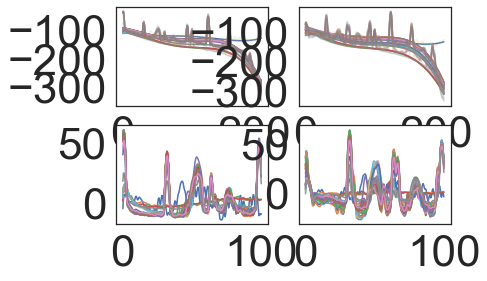

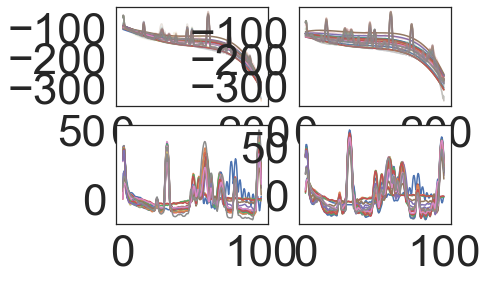

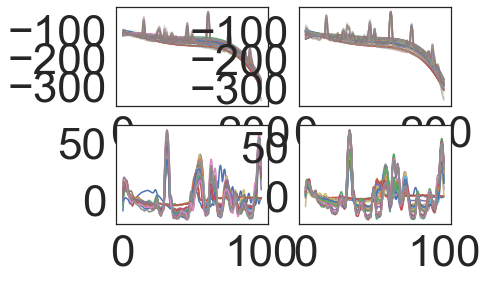

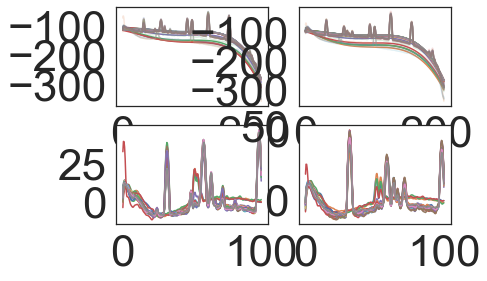

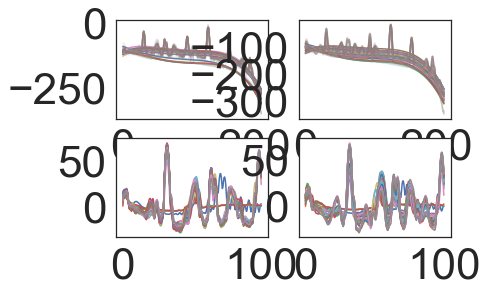

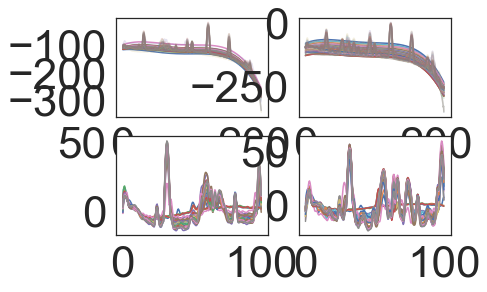

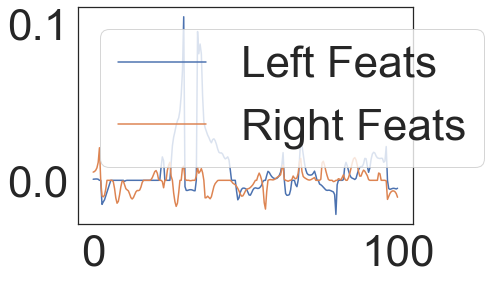

In [4]:
analysis.run_EN(alpha_list=
                np.linspace(0.1,0.5,100))
analysis.plot_EN_coeffs()


906 Spearman:
SpearmanrResult(correlation=0.41650714589658155, pvalue=0.027471479300760125)
907 Spearman:
SpearmanrResult(correlation=0.42590512002636244, pvalue=0.023835406176313398)
905 Spearman:
SpearmanrResult(correlation=0.14777328917964266, pvalue=0.4529976951375594)
908 Spearman:
SpearmanrResult(correlation=0.15911099723856753, pvalue=0.41867512520819394)


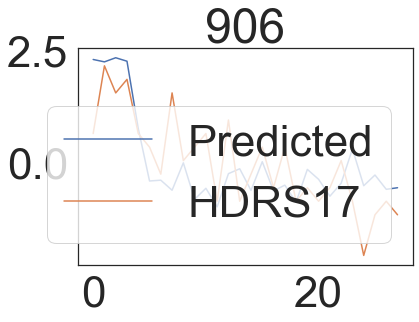

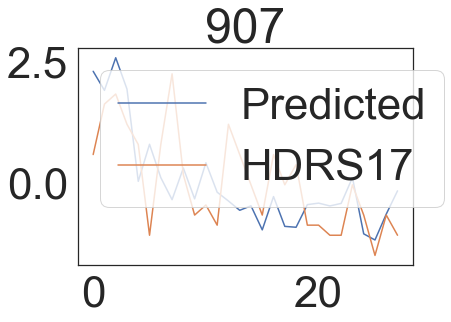

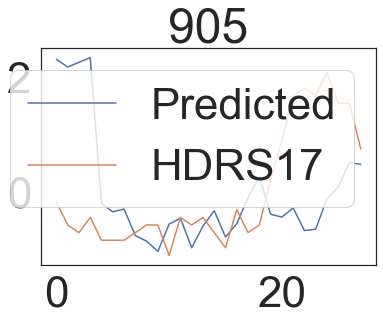

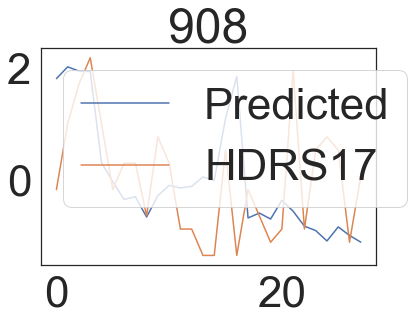

In [5]:

analysis.plot_tests()


ENR has Spearman: SpearmanrResult(correlation=0.27895949405909826, pvalue=0.002896885286089624)
ENR model has 0.3524910099024712 correlation with real score (p < 0.00013803722463696805)


/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/DBSpace/readout/DSV.py:590: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


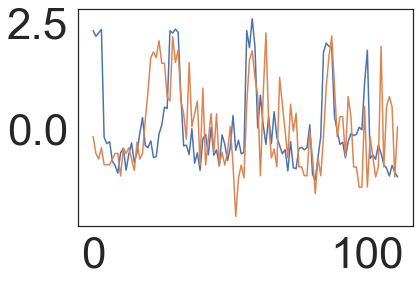

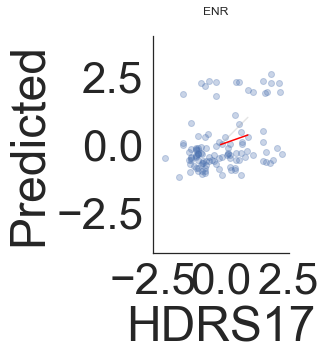

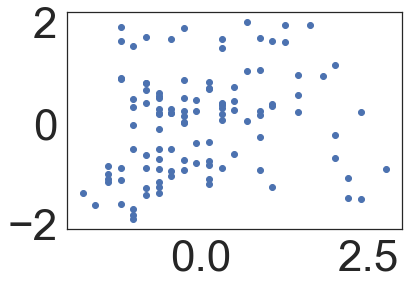

In [6]:
analysis.plot_performance(ranson=False)

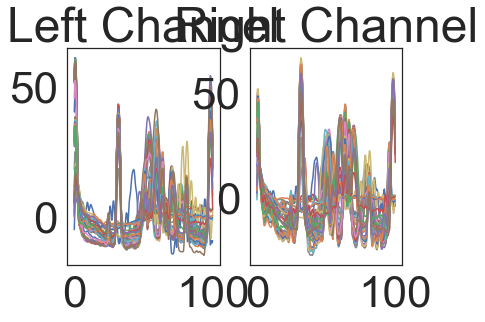

In [7]:
analysis.plot_dsgn_matrix()

## Discussion
